In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

In [2]:
# CNN Architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [3]:

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=False)


In [4]:
# Initialize the CNN model
model = Net().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Training the Model
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Testing the Model
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')






In [5]:
# Main training loop
for epoch in range(1, 10):
    train(epoch)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314907
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.329962
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.284324
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.278477
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.295683
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.279773
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.325468
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.274153
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.270671
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.258749
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.250224
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.246612
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.208109
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.229149
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.201940
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.162594
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.092918
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.034765
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.085773
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.030843
Train Epoch: 1 [12800/60000 (

In [6]:
# Save the model
torch.save(model.state_dict(), 'model.pth')

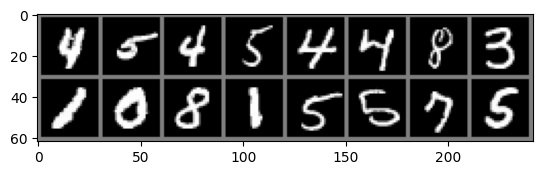

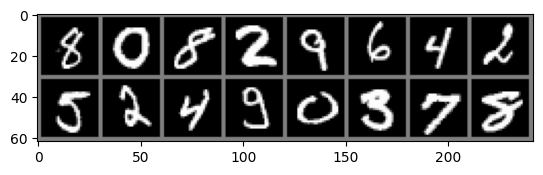

In [12]:
#Checking images of training and testing randomly

import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=True)

# Function to show images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

# Get random testing images
dataiter = iter(test_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


Prediction for testing data\Screenshot 2023-12-08 125037.png: 4


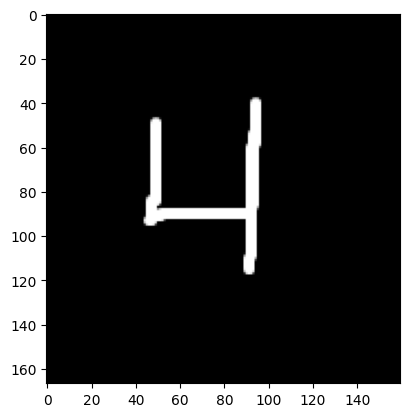

Prediction for testing data\Screenshot 2023-12-08 125111.png: 7


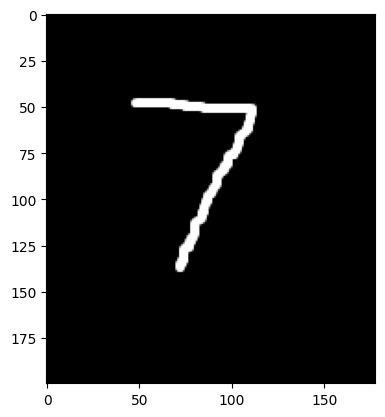

Prediction for testing data\Screenshot 2023-12-08 125144.png: 6


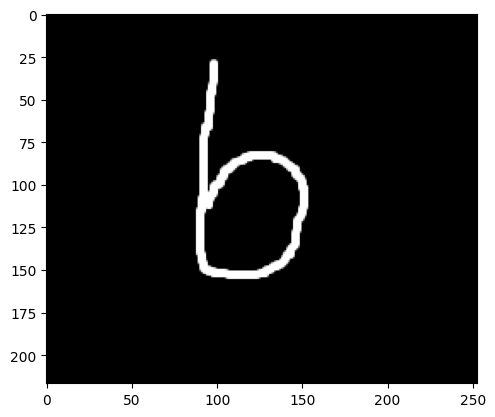

Prediction for testing data\Screenshot 2023-12-08 125219.png: 3


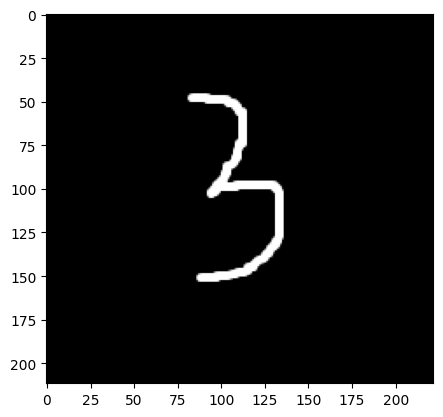

Prediction for testing data\Screenshot 2023-12-08 125244.png: 9


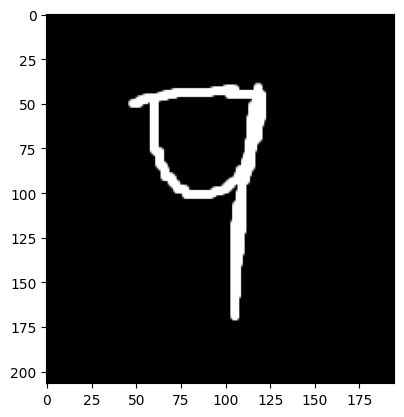

Prediction for testing data\Screenshot 2023-12-08 125311.png: 0


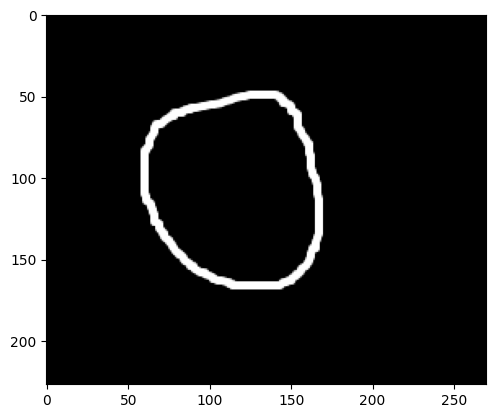

Prediction for testing data\Screenshot 2023-12-08 125344.png: 8


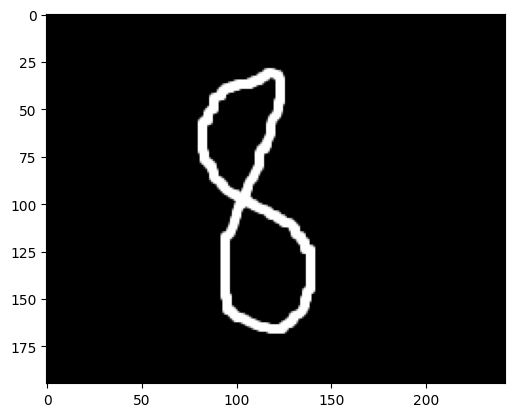

Prediction for testing data\Screenshot 2023-12-08 125439.png: 1


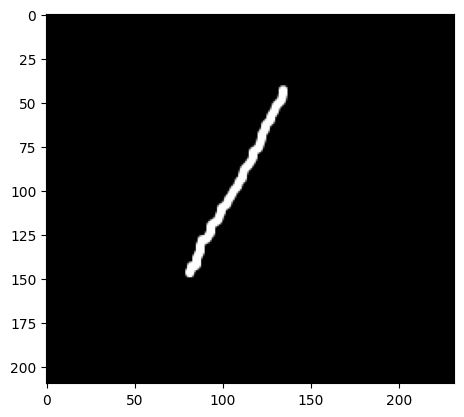

In [16]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import os


# CNN Architecture (must match the one used for training)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

# Load the trained model
model = Net()
model.load_state_dict(torch.load('model.pth', map_location=torch.device('cpu')))
model.eval()

# Image preprocessing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

def predict_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    image = image.unsqueeze(0)  # add batch dimension

    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Directory containing the images
image_directory = "testing_imgs"

# List all files in the directory
sample_images = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith(('png', 'jpg', 'jpeg'))]



for img_path in sample_images:
    prediction = predict_image(img_path)
    print(f'Prediction for {img_path}: {prediction}')
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
